$$ \text{Assignment:1} $$
$$ \text{Name: Aanchal Kandpal} $$
$$ \text{Reg Number: 22MDT0115}$$
$$ \text{Slot: D2} $$
$$ \text{Course Title: Exploratory Data Analysis}$$

## Description
The data is basically about the districts of Karnataka where it shows about the population, slums, SC, ST  etc and the objective
of performing EDA on the slum dataset is to gain insights into the characteristics and distribution of slums across districts. This analysis aims to identify patterns, assess demographic composition, and explore correlations between variables. By conducting EDA, we aim to inform decision-making and develop a deeper understanding of the slum population for potential interventions and improvements. The Dataset is taken from https://data.gov.in/ 

#### Software used: Python

## Importing Dataset and libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/AANCHAL/OneDrive/slum_data.csv")

### Descriptive Statistics

In [3]:
df.head()

,Sl / No,District Name,Total Slums,Declared Slums,Identified Slums,Total Families,SC,ST,Others,Total Population
0,1.0,2,3,4,5,6,7,8,9,10
1,1.0,Bengaluru urban,434,409,25,321296,582999,275743,677803,1536545
2,2.0,Bengaluru Rural,33,33,0,8196,20538,13382,20514,54434
3,3.0,Bagalakote,100,84,16,8152,18280,5225,24255,47760
4,4.0,Ballari,198,185,13,30464,39857,25183,89278,154318


#### Data Cleaning on districts
Initially while inspecting it was found that it has entries like "total", "total district(s)" this
doesn't look like an district name so while investigating it seems to be an total value of that state
poppuplation. If it is present in the data it will mess up by increasing the population in
each category so, found the indexes of that total and removed from the dataset.

In [4]:
df= df[1:31]
df.head()

,Sl / No,District Name,Total Slums,Declared Slums,Identified Slums,Total Families,SC,ST,Others,Total Population
1,1.0,Bengaluru urban,434,409,25,321296,582999,275743,677803,1536545
2,2.0,Bengaluru Rural,33,33,0,8196,20538,13382,20514,54434
3,3.0,Bagalakote,100,84,16,8152,18280,5225,24255,47760
4,4.0,Ballari,198,185,13,30464,39857,25183,89278,154318
5,5.0,Belagavi,193,193,0,21589,55314,15424,57205,127943


In [5]:
# Drop the first column
df = df.drop(df.columns[0], axis=1)

In [6]:
# Display the first few rows of the dataset
df.head()

,District Name,Total Slums,Declared Slums,Identified Slums,Total Families,SC,ST,Others,Total Population
1,Bengaluru urban,434,409,25,321296,582999,275743,677803,1536545
2,Bengaluru Rural,33,33,0,8196,20538,13382,20514,54434
3,Bagalakote,100,84,16,8152,18280,5225,24255,47760
4,Ballari,198,185,13,30464,39857,25183,89278,154318
5,Belagavi,193,193,0,21589,55314,15424,57205,127943


In [7]:
# Summary statistics of numerical columns
df.describe()

,Total Slums,Declared Slums,Identified Slums,Total Families,SC,ST,Others,Total Population
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,95.000000,91.666667,3.333333,24873.533333,46225.133333,19604.500000,69170.366667,1.350000e+05
std,80.251329,76.381679,6.748350,57067.597282,104273.430487,48822.950414,121091.521811,2.721723e+05
min,10.000000,10.000000,0.000000,1036.000000,1988.000000,181.000000,1512.000000,3.681000e+03
25%,49.750000,49.500000,0.000000,7399.500000,13096.250000,5531.500000,21306.500000,4.581150e+04
50%,78.500000,74.000000,0.000000,11221.000000,18855.000000,10900.000000,34507.500000,6.422800e+04
75%,111.750000,111.750000,2.000000,21262.500000,36361.750000,15254.000000,74209.750000,1.292248e+05
max,434.000000,409.000000,25.000000,321296.000000,582999.000000,275743.000000,677803.000000,1.536545e+06


In [8]:
# Check for missing values
df.isnull().sum()

District Name        0
Total Slums          0
Declared Slums       0
Identified Slums     0
Total Families       0
SC                   0
ST                   0
Others               0
Total Population     0
dtype: int64

## Data Visualization

### Boxplot (detection of outlier)

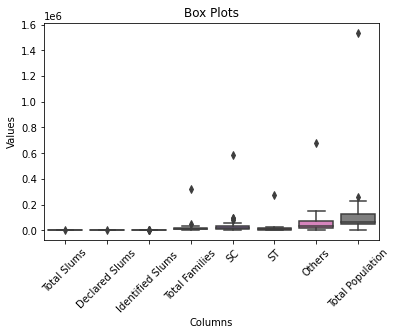

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include='number')

# Create box plots for the numerical columns
plt.figure()
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plots')
plt.show()


### Histogram plot

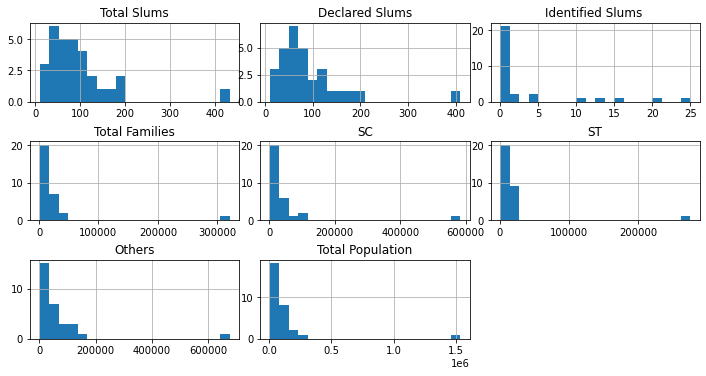

In [10]:
# Plot histograms for the numerical columns
import itertools

col = df.columns[1:]
plt.subplots(figsize = (12,8))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length//2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

### Pairplot

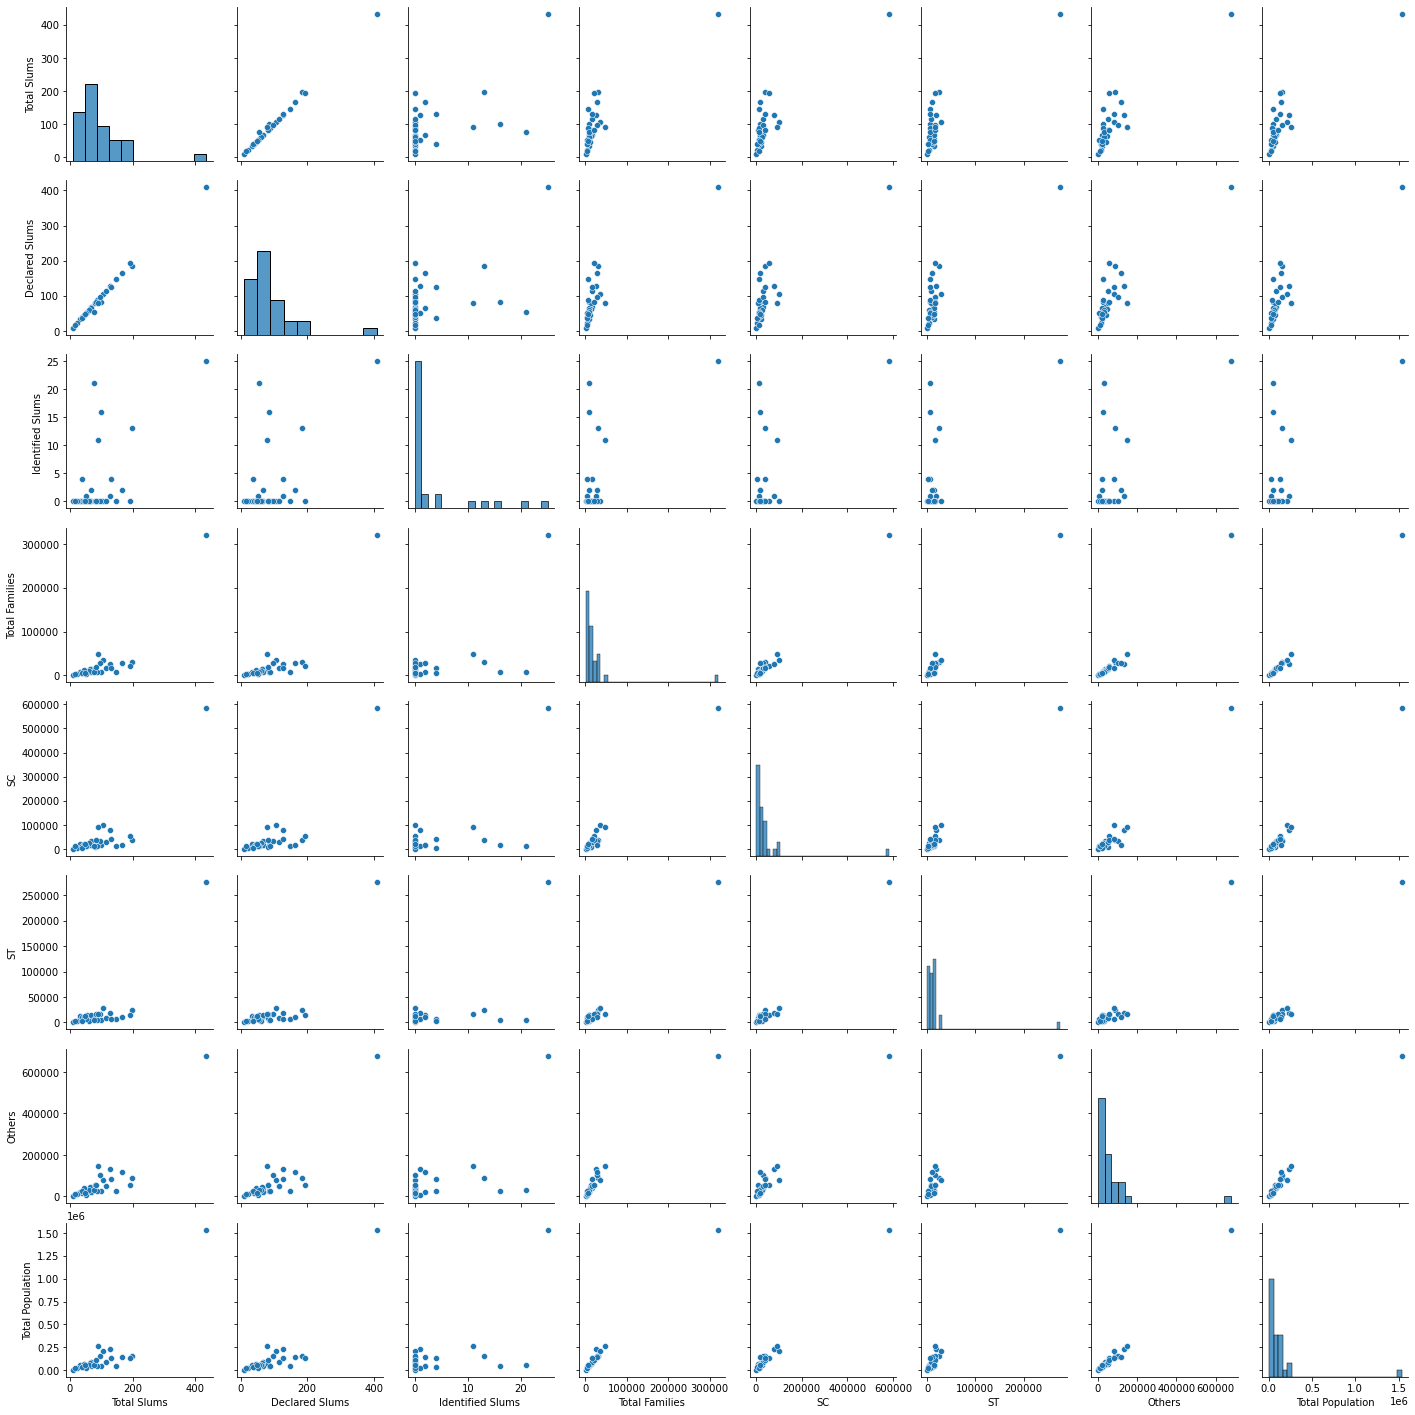

In [11]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Create a scatter plot matrix using Seaborn
sns.pairplot(numerical_cols)

# Show the plot
plt.show()

###  District having highest and lowest slums

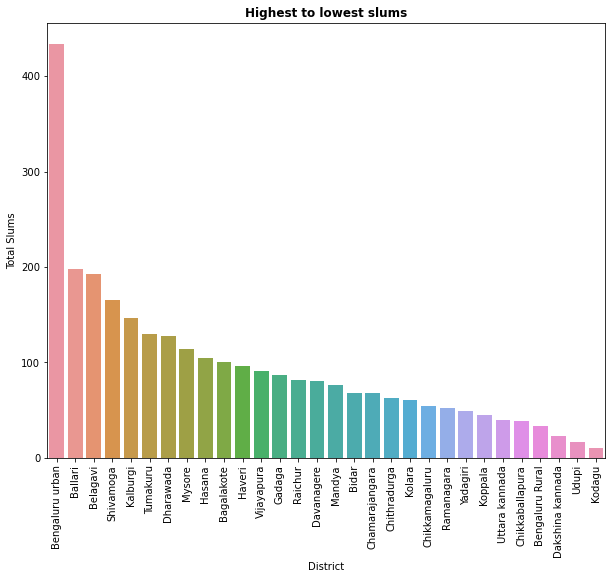

In [12]:
#(DISTRICT VS TOTAL SLUMS)

hl_data = df.sort_values(by='Total Slums',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='District Name',y='Total Slums',data=hl_data)
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Total Slums')
plt.title("Highest to lowest slums",fontweight='bold')
plt.show()

#### From the above bar plot it is seen that Bengaluru urban has the highest number of slums while Kodagu has the least

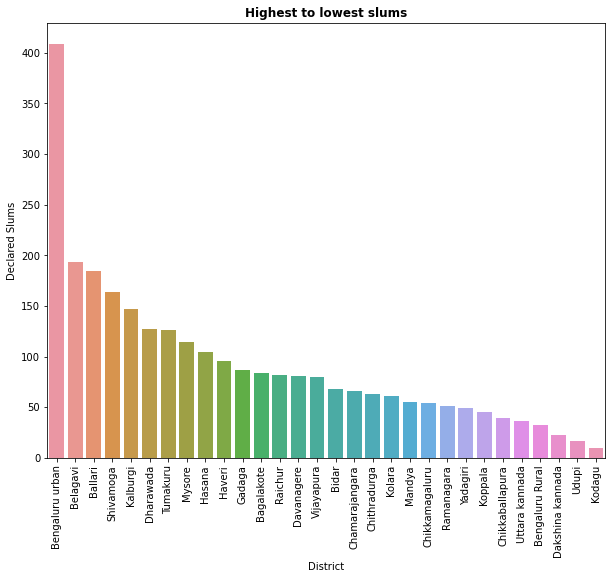

In [13]:
# (DISTRICT VS DECLARED SLUMS)

hl_data_3 = df.sort_values(by='Declared Slums',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='District Name',y='Declared Slums',data=hl_data_3)
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Declared Slums')
plt.title("Highest to lowest declared slums",fontweight='bold')
plt.show()

####  From the above bar plot it is seen that Bengaluru has the most number of  declared slums and Kodagu has least

### Relationship between the number of slums and the total population

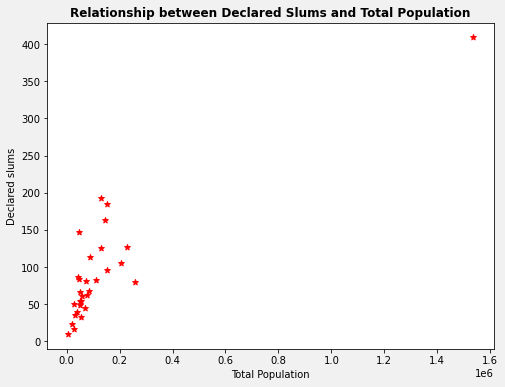

In [14]:
slums = df['Declared Slums']
total_population = df['Total Population']

# Plotting the scatter plot
plt.figure(figsize=(8, 6),facecolor='#f1f1f1')
plt.scatter(total_population, slums,marker="*",color='red')
plt.xlabel('Total Population')
plt.ylabel('Declared slums')
plt.title('Relationship between Declared Slums and Total Population',fontweight='bold')
plt.show()

### Dstribution of declared slums across different districts

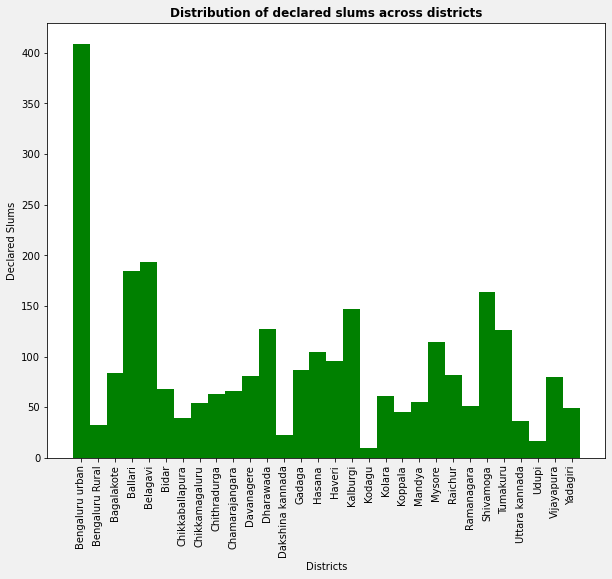

In [15]:
district = df['District Name']
declared_slums = df['Declared Slums']

plt.figure(figsize=(10,8),facecolor='#f1f1f1')
plt.bar(district,declared_slums,width=1,color='g')
plt.xticks(rotation=90)
plt.xlabel('Districts')
plt.ylabel('Declared Slums')
plt.title('Distribution of declared slums across districts',fontweight='bold')
plt.show()

### Relationship between SC, ST & Other slums

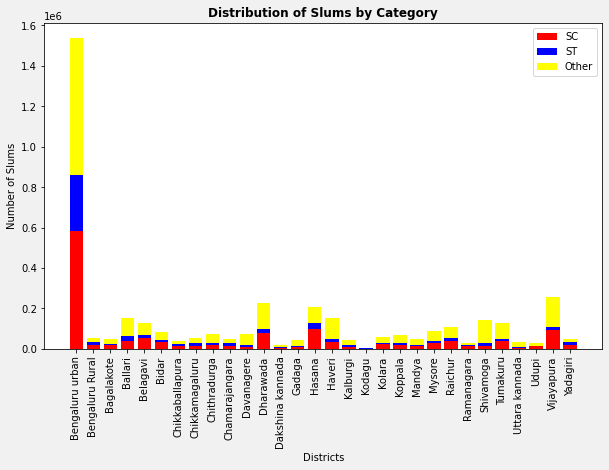

In [16]:
districts = df['District Name']
sc_slums = df['SC']
st_slums = df['ST']
other_slums = df['Others']

# stacked bar plot
plt.figure(figsize=(10, 6),facecolor='#f1f1f1')
plt.bar(districts, sc_slums, label='SC',color='red')
plt.bar(districts, st_slums, bottom=sc_slums, label='ST',color='blue')
plt.bar(districts, other_slums, bottom=st_slums+sc_slums, label='Other',color='yellow')
plt.xlabel('Districts')
plt.ylabel('Number of Slums')
plt.title('Distribution of Slums by Category',fontweight='bold')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Heat map (Correlation between the attributes)

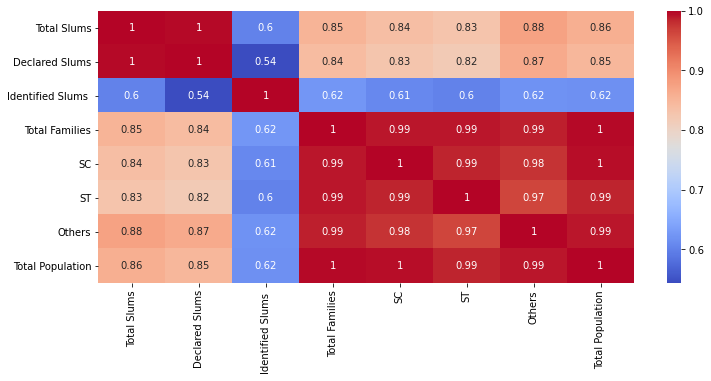

In [17]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12,5))
# Heatmap
sns.heatmap(df.corr(), annot = True,ax = ax, cmap='coolwarm')
plt.show()

### Conclusion
The visualization consistently reveals that Bengaluru Urban, among all the 27 districts of Karnataka, has the highest slum population across various categories such as SC, ST, and others. Regardless of the specific aspect considered, Bengaluru Urban consistently stands out as having the largest slum population.